# True Anomaly Solver

## Authors: Hannah Bish, Owen Lehmer, Matt Wilde

### Solve keplers equation using Newtons method

In [6]:
using PyPlot

In [8]:
#####################################
#TrueAnomaly()
#Solve Kepler's equation for the true anomaly using Newton's method.
#Input
#e   The eccentricity of the orbit [0<e<1]
#m   The mean anomaly in radians [0<m<2pi]
#t   The tolerance desired for this calculation in decimal format [i.e. 0.00001]
#val return f or E for plotting purposes
#Return
#f   The true anomaly [0<f<2pi] on success. -1 on failure
#####################################
function TrueAnomaly(e, m, t, val)
    ea = m+0.85*e*sign(sin(m)) #initial guess of eccentric anomaly
    d = ea - e*sin(ea) - m

    num_iter = 0
    iter_limit = 30
    while abs(d) > t && num_iter < iter_limit
        num_iter+=1
        deltaEa = d/(1 - e*cos(ea))
        ea = ea - deltaEa
        d = ea - e*sin(ea) - m
    end
    #println(ea)

    f = -1
    if num_iter < iter_limit
        #success
        #tan(f/2)=sqrt((1+e)/(1-e))*tan(ea/2)
        f = atan2(sqrt(1-e^2)*sin(ea),cos(ea)-e)
    end
    if val
        return f
    end
    return ea
end

TrueAnomaly (generic function with 1 method)

### Plot $E$ and $f$ for a range of eccentricities:

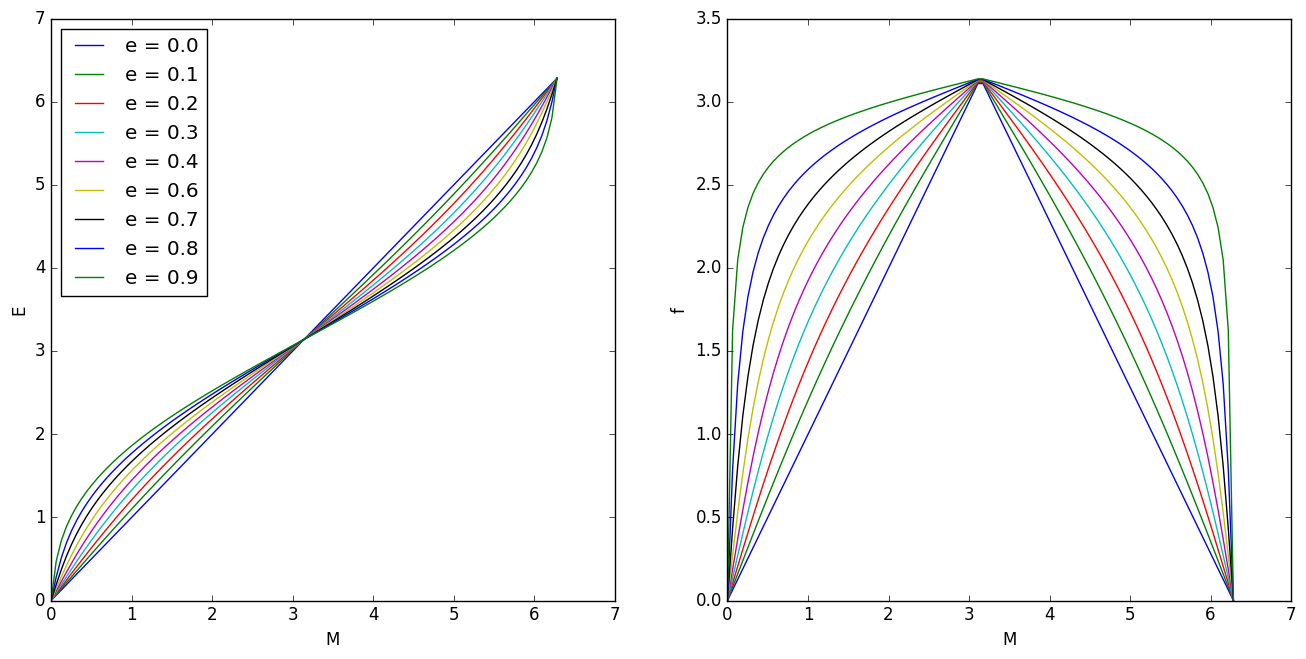

In [12]:
e = linspace(0,0.9,9)
M = linspace(0,2pi,100)
E = zeros(M)
f = zeros(M)

ecc = 0.0
figure(figsize=(16,16))
for i=1:9
    for j=1:100
        E[j] = TrueAnomaly(e[i], M[j], 1e-5, false)
        f[j] = TrueAnomaly(e[i], M[j], 1e-5, true)
    end
    
    ecc = round(e[i],1)
    
    
    subplot(221)
    plot(M, E, label="e = $ecc")
    legend(loc="upper left")
    xlabel("M")
    ylabel("E")
    
    subplot(222)
    plot(M, abs(f), label="e = $ecc")
    xlabel("M")
    ylabel("f")
end